In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 1. Load the Dataset and Relevant Libraries

In [12]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from IPython.display import display, HTML

df = pd.read_csv('lung cancer survey.csv')
df_no_na = df.dropna()

df_age = df_no_na[df_no_na["AGE"] > 21]
df_age

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0.0,61.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,70.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2,1.0,59.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,54.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
4,0.0,54.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8996,1.0,62.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
8997,0.0,71.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
8998,1.0,63.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
8999,1.0,70.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0


# 2. Split the Data into the Training and Validation Sets

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from IPython.display import display, HTML


feature_names = df_age.columns.drop(["LUNG_CANCER"])
X = df_age[feature_names].values
y = df_age["LUNG_CANCER"].values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 888)

# 3. Decision Tree Classifier
With cost-complexity pruning.

In [7]:
# Define your Decision Tree
model_tree = DecisionTreeClassifier(random_state=888, criterion = "entropy", class_weight = "balanced")

# Use cost complexity pruning and get sequence of alphas
path = model_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas  # effective alphas of each subtree

# Define the Decision Tree for each alpha
trees = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state = 888, criterion = "entropy", class_weight = "balanced", ccp_alpha = ccp_alpha)
    trees.append(clf)

# Use K-fold cross-validation to choose the best alpha
kf = KFold(n_splits=10, shuffle=True, random_state=888)
mean_cv_errors = []

for clf in trees:
    # Perform cross-validation and get the average error for each alpha
    cv_scores = cross_val_score(clf, X_train, y_train, cv=kf, scoring='f1')
    mean_cv_errors.append(np.mean(cv_scores))  # Get average accuracy for each alpha

# Find the optimal alpha (the one that maximizes the cross-validated accuracy)
optimal_alpha_index = np.argmax(mean_cv_errors)
optimal_alpha = ccp_alphas[optimal_alpha_index]
print(f"Optimal alpha: {optimal_alpha:.8f}")

# Prune the tree using the optimal alpha on the training set
pruned_tree = DecisionTreeClassifier(criterion='entropy', random_state=888, ccp_alpha=optimal_alpha)
pruned_tree.fit(X_train, y_train)

# Evaluate the pruned tree on the validation set
y_pred_pruned = pruned_tree.predict(X_val)
print(f"Corresponding Accuracy Score: {accuracy_score(y_pred_pruned, y_val)}")
print(f"Corresponding Precision Score: {precision_score(y_pred_pruned, y_val)}")
print(f"Corresponding Recall Score: {recall_score(y_pred_pruned, y_val)}")
print(f"Corresponding F1 Score: {f1_score(y_pred_pruned, y_val)}")

Optimal alpha: 0.00290651


DecisionTreeClassifier(ccp_alpha=0.0029065065762915107, criterion='entropy',
                       random_state=888)

Corresponding Accuracy Score: 0.8605555555555555
Corresponding Precision Score: 0.9916201117318436
Corresponding Recall Score: 0.8559373116335142
Corresponding F1 Score: 0.9187965059851181


In [10]:
#Print tree structure as text
tree_rules = export_text(pruned_tree, feature_names = feature_names)
print("Decision Tree Rules:\n", tree_rules)
display(HTML("<p style='text-align: left; font-weight: bold;'>Figure. x</p>"))

Decision Tree Rules:
 |--- ALCOHOL CONSUMING <= 0.50
|   |--- YELLOW_FINGERS <= 0.50
|   |   |--- GENDER <= 0.50
|   |   |   |--- WHEEZING <= 0.50
|   |   |   |   |--- class: 1.0
|   |   |   |--- WHEEZING >  0.50
|   |   |   |   |--- ALLERGY  <= 0.50
|   |   |   |   |   |--- SWALLOWING DIFFICULTY <= 0.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- SWALLOWING DIFFICULTY >  0.50
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- ALLERGY  >  0.50
|   |   |   |   |   |--- FATIGUE  <= 0.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- FATIGUE  >  0.50
|   |   |   |   |   |   |--- class: 1.0
|   |   |--- GENDER >  0.50
|   |   |   |--- SWALLOWING DIFFICULTY <= 0.50
|   |   |   |   |--- WHEEZING <= 0.50
|   |   |   |   |   |--- ALLERGY  <= 0.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- ALLERGY  >  0.50
|   |   |   |   |   |   |--- FATIGUE  <= 0.50
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- F

# 4. Bagging Classifier 
criterion = "entropy", class_weight = "balanced", n_estimators = 300  
With hyperparamter-tuning for max_depth.

In [23]:
#Initialize parameter grid
param_grid = {
    'max_depth': (None, 5, 10, 15, 20, 25, 30),
}

# Initialize the Random Forest model
bagging_classifier = RandomForestClassifier(random_state=888, criterion='entropy', class_weight = "balanced", n_estimators = 300)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator = bagging_classifier, param_grid = param_grid, 
                           scoring = 'f1', cv = 10, n_jobs = -1, verbose = 0)

# Train the model on the training data
grid_search.fit(X_train, y_train)
best_bagging = grid_search.best_estimator_

# Predict on validation observations
y_pred = best_bagging.predict(X_val)

# Print results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Corresponding Accuracy Score: {accuracy_score(y_pred, y_val)}")
print(f"Corresponding Precision Score: {precision_score(y_pred, y_val)}")
print(f"Corresponding Recall Score: {recall_score(y_pred, y_val)}")
print(f"Corresponding F1 Score: {f1_score(y_pred, y_val)}")

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              criterion='entropy',
                                              n_estimators=300,
                                              random_state=888),
             n_jobs=-1, param_grid={'max_depth': (None, 5, 10, 15, 20, 25, 30)},
             scoring='f1')

Best Parameters: {'max_depth': 15}
Corresponding Accuracy Score: 0.875
Corresponding Precision Score: 0.9797486033519553
Corresponding Recall Score: 0.8774233896185115
Corresponding F1 Score: 0.9257670735730782


<BarContainer object of 15 artists>

Text(0, 0.5, 'Feature Importance')

Text(0.5, 1.0, 'Feature Importance in Random Forest')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'AGE'),
  Text(1, 0, 'YELLOW_FINGERS'),
  Text(2, 0, 'ALCOHOL CONSUMING'),
  Text(3, 0, 'GENDER'),
  Text(4, 0, 'WHEEZING'),
  Text(5, 0, 'SWALLOWING DIFFICULTY'),
  Text(6, 0, 'ALLERGY '),
  Text(7, 0, 'SMOKING'),
  Text(8, 0, 'CHRONIC DISEASE'),
  Text(9, 0, 'COUGHING'),
  Text(10, 0, 'SHORTNESS OF BREATH'),
  Text(11, 0, 'CHEST PAIN'),
  Text(12, 0, 'ANXIETY'),
  Text(13, 0, 'PEER_PRESSURE'),
  Text(14, 0, 'FATIGUE ')])

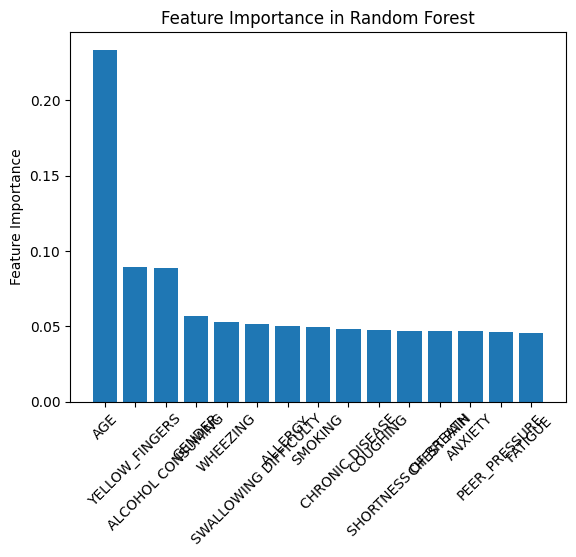

In [24]:

# Generate feature importances plot
feature_importances = best_bagging.feature_importances_
indices = np.argsort(feature_importances)[::-1]         
plt.bar(np.array(feature_names)[indices], feature_importances[indices])
plt.ylabel('Feature Importance')
plt.title('Feature Importance in Random Forest')
plt.xticks(rotation=45)                                   
plt.show()

# 5. Random Forest Classifier 
criterion = "entropy", class_weight = "balanced", n_estimators = 300  
With hyperparameter-tuning for max_depth and max_features.

In [25]:
#Initialize parameter grid
param_grid = {
    'max_depth': (None, 5, 10, 15, 20, 25, 30),
    'max_features':(0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9),
}

# Initialize the Random Forest model
RF_classifier = RandomForestClassifier(random_state=888, criterion = "entropy", class_weight = "balanced", n_estimators = 300)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator = RF_classifier, param_grid = param_grid, 
                           scoring = "f1", cv = 10, n_jobs = -1, verbose = 0)

# Train the model on the training data
grid_search.fit(X_train, y_train)
best_RF = grid_search.best_estimator_

# Predict on validation observations
y_pred = best_RF.predict(X_val)

# Print results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Corresponding Accuracy Score: {accuracy_score(y_pred, y_val)}")
print(f"Corresponding Precision Score: {precision_score(y_pred, y_val)}")
print(f"Corresponding Recall Score: {recall_score(y_pred, y_val)}")
print(f"Corresponding F1 Score: {f1_score(y_pred, y_val)}")

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              criterion='entropy',
                                              n_estimators=300,
                                              random_state=888),
             n_jobs=-1,
             param_grid={'max_depth': (None, 5, 10, 15, 20, 25, 30),
                         'max_features': (0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                          0.8, 0.9)},
             scoring='f1')

Best Parameters: {'max_depth': 15, 'max_features': 0.4}
Corresponding Accuracy Score: 0.8783333333333333
Corresponding Precision Score: 0.9832402234636871
Corresponding Recall Score: 0.8783530879600748
Corresponding F1 Score: 0.927841845140033


<BarContainer object of 15 artists>

Text(0, 0.5, 'Feature Importance')

Text(0.5, 1.0, 'Feature Importance in Random Forest')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'AGE'),
  Text(1, 0, 'YELLOW_FINGERS'),
  Text(2, 0, 'ALCOHOL CONSUMING'),
  Text(3, 0, 'WHEEZING'),
  Text(4, 0, 'GENDER'),
  Text(5, 0, 'SWALLOWING DIFFICULTY'),
  Text(6, 0, 'SMOKING'),
  Text(7, 0, 'ALLERGY '),
  Text(8, 0, 'SHORTNESS OF BREATH'),
  Text(9, 0, 'PEER_PRESSURE'),
  Text(10, 0, 'FATIGUE '),
  Text(11, 0, 'CHRONIC DISEASE'),
  Text(12, 0, 'CHEST PAIN'),
  Text(13, 0, 'ANXIETY'),
  Text(14, 0, 'COUGHING')])

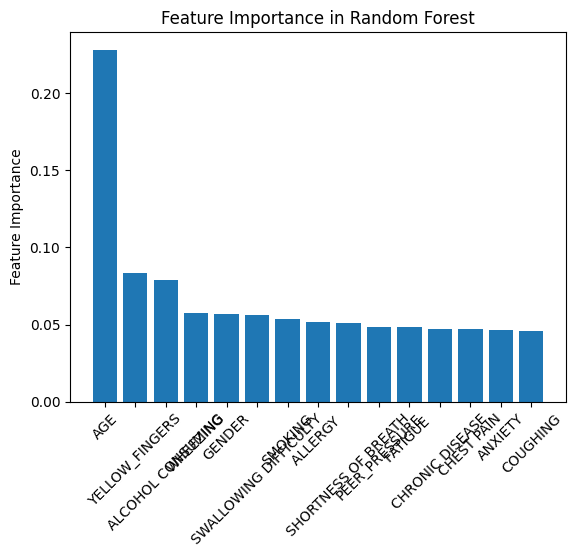

In [26]:
# Generate feature importances plot
feature_importances = best_RF.feature_importances_
indices = np.argsort(feature_importances)[::-1]         
plt.bar(np.array(feature_names)[indices], feature_importances[indices])
plt.ylabel("Feature Importance")
plt.title("Feature Importance in Random Forest")
plt.xticks(rotation=45)                                   
plt.show()